In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set()

df = pd.read_csv("/content/data.csv")

In [64]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75083 entries, 0 to 75082
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              75083 non-null  object 
 1   VISIBILITY        75083 non-null  float64
 2   DRYBULBTEMPF      75083 non-null  int64  
 3   WETBULBTEMPF      75083 non-null  int64  
 4   DewPointTempF     75083 non-null  int64  
 5   RelativeHumidity  75083 non-null  int64  
 6   WindSpeed         75083 non-null  int64  
 7   WindDirection     75083 non-null  int64  
 8   StationPressure   75083 non-null  float64
 9   SeaLevelPressure  75083 non-null  float64
 10  Precip            75083 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000
mean,9.211896,55.355527,49.327544,42.424024,64.812075,11.253240,196.550751,30.005579,30.026049,0.005478
std,2.202311,17.394334,16.182867,19.577957,19.898962,6.101048,107.692804,0.235172,0.234069,0.036161
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,0.000000,28.520000,28.540000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,110.000000,29.860000,29.880000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,200.000000,30.000000,30.020000,0.000000
75%,10.000000,70.000000,64.000000,59.000000,82.000000,15.000000,290.000000,30.150000,30.170000,0.000000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,30.850000,2.410000


In [65]:
features_with_na = [col for col in df.columns if df[col].isnull().sum() > 0]

print("Features with missing values:")
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 3), "%")

print("Duplicate rows:", df.duplicated().sum())

Features with missing values:
Duplicate rows: 0


In [66]:
columns = [col for col in df.columns if col != "VISIBILITY"]

numeric_features = [col for col in columns if df[col].dtype != 'O']
categorical_features = [col for col in columns if df[col].dtype == 'O']

print("Numerical Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['DRYBULBTEMPF', 'WETBULBTEMPF', 'DewPointTempF', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure', 'SeaLevelPressure', 'Precip']
Categorical Features: ['DATE']


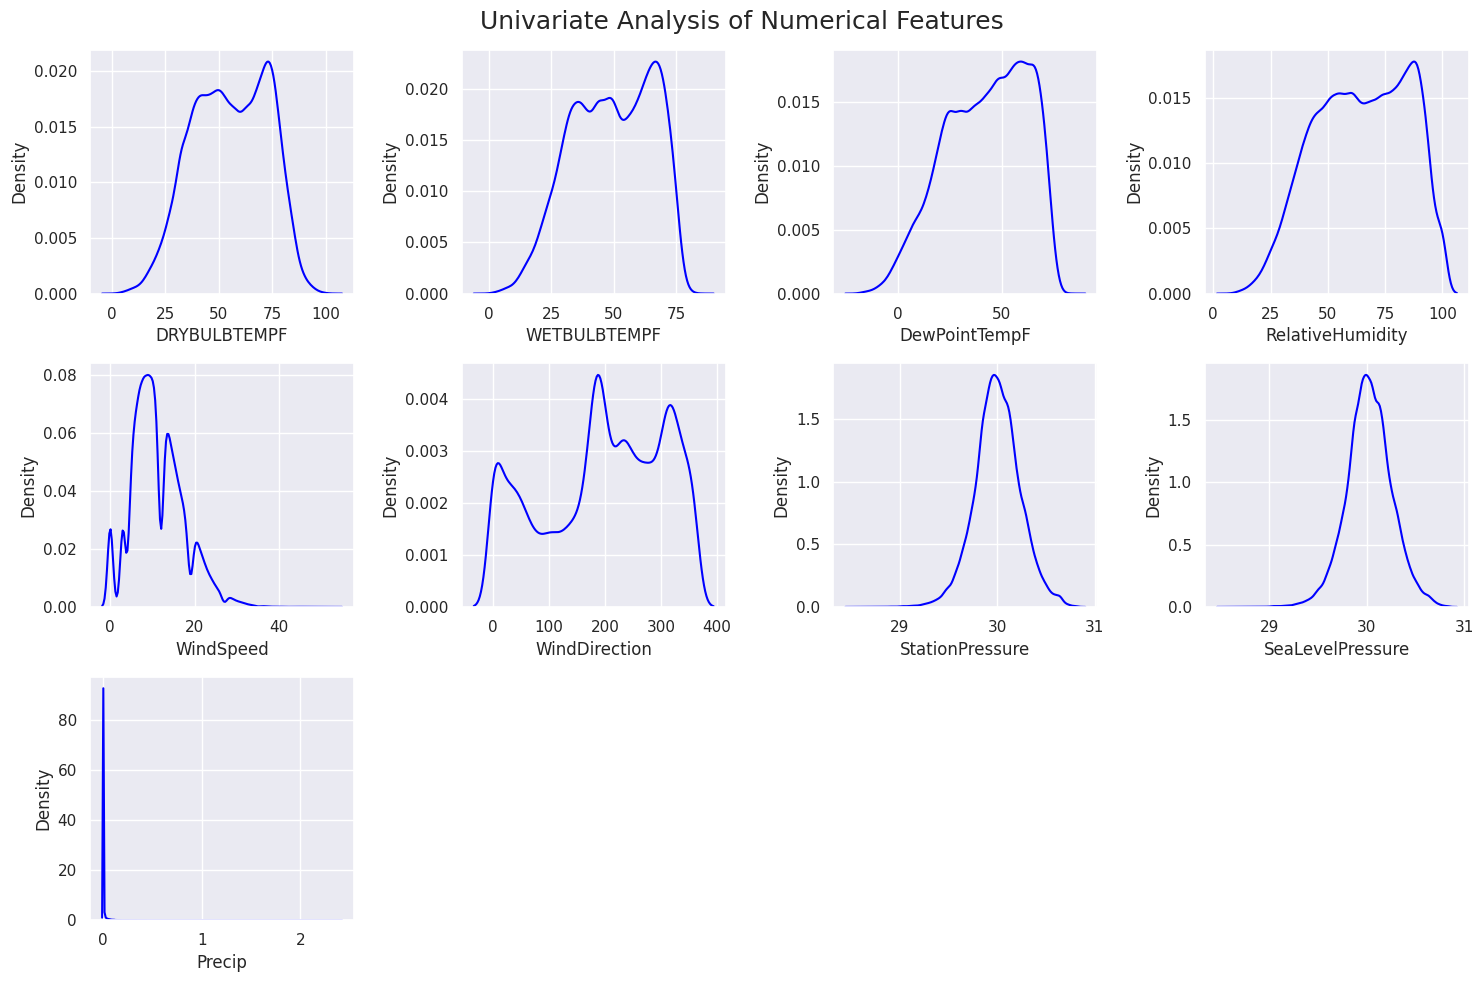

In [67]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=18)

for i, col in enumerate(numeric_features):
    plt.subplot(3,4,i+1)
    sns.kdeplot(df[col], color='blue')
    plt.xlabel(col)
    plt.tight_layout()

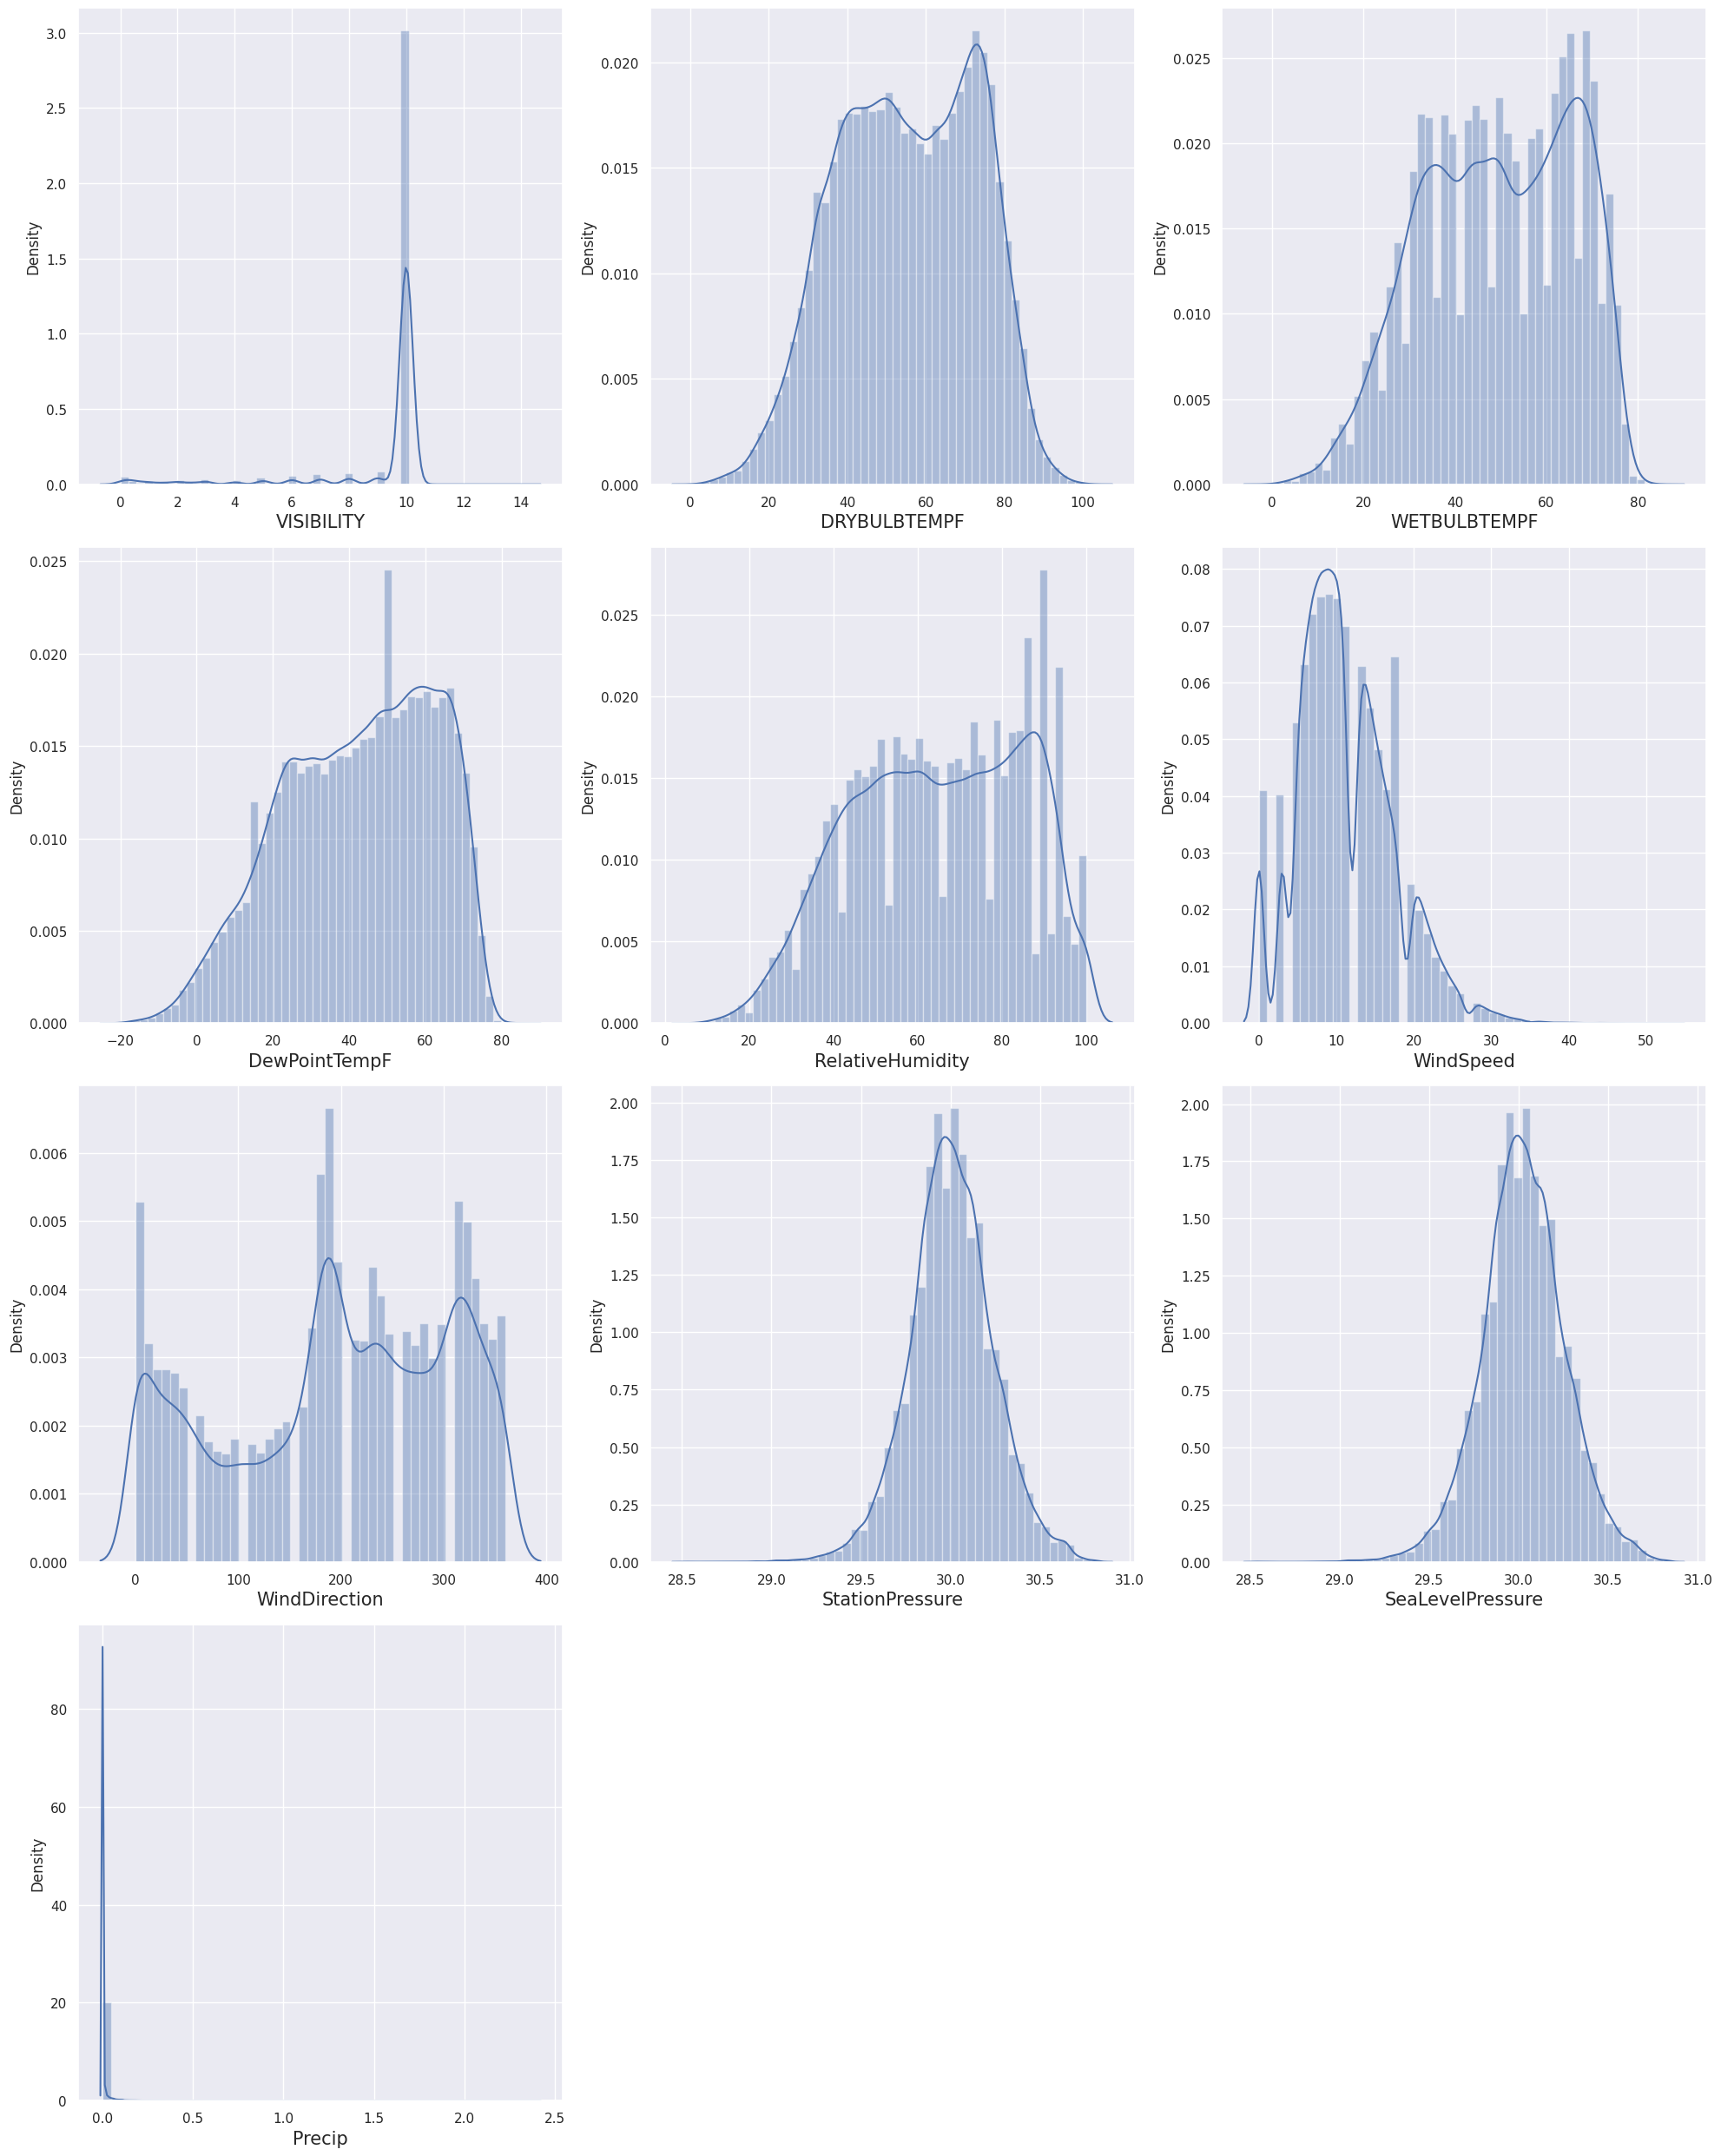

In [68]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df.drop(['DATE'], axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column, fontsize=15)
    plotnumber += 1

plt.tight_layout()

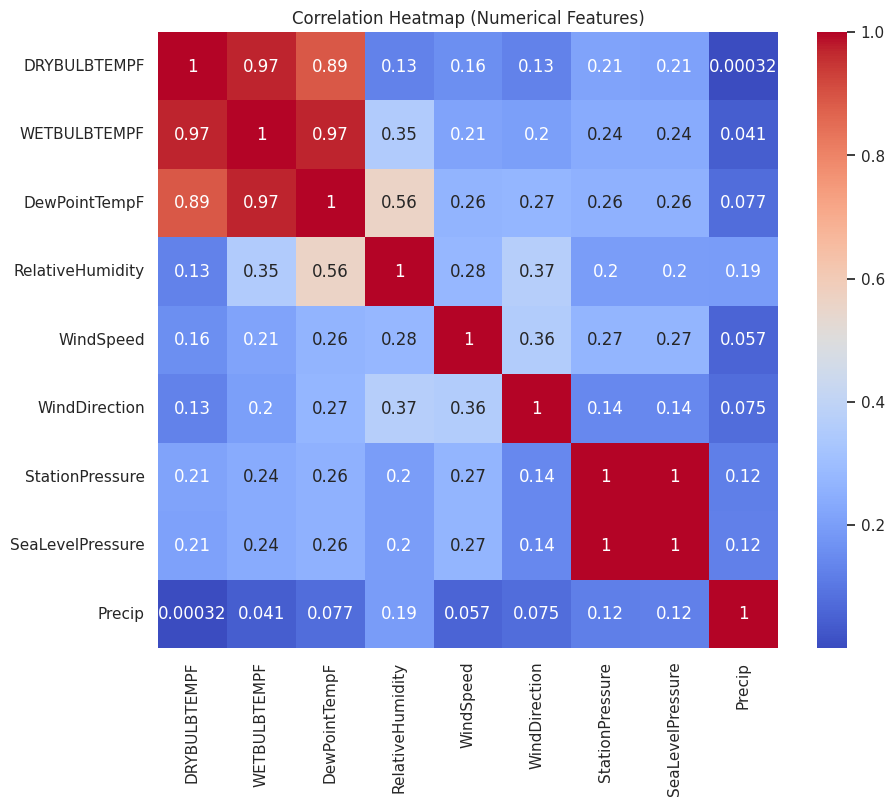

In [69]:
# Select only numerical features for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Remove target variable
numeric_df = numeric_df.drop(columns=['VISIBILITY'])

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_df.corr().abs(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [70]:
df = df.drop(columns=['Precip'])

In [71]:
df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96


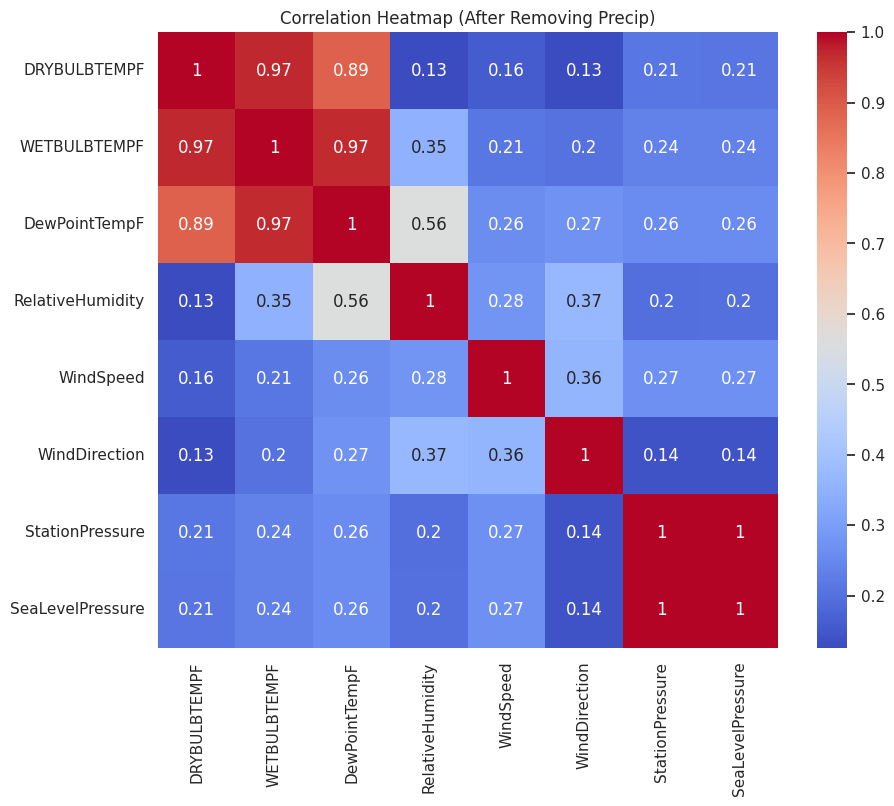

In [72]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Exclude target variable
if 'VISIBILITY' in numeric_df.columns:
    numeric_df_corr = numeric_df.drop(columns=['VISIBILITY'])
else:
    numeric_df_corr = numeric_df.copy()

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_df_corr.corr().abs(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap (After Removing Precip)")
plt.show()

In [73]:
cols_to_drop_stage2 = [
    'WETBULBTEMPF',
    'DewPointTempF',
    'StationPressure'
]

df = df.drop(columns=[col for col in cols_to_drop_stage2 if col in df.columns])

df.head()


,DATE,VISIBILITY,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure
0,2010-01-01 00:51:00,6.0,33,92,0,0,29.99
1,2010-01-01 01:51:00,6.0,33,96,0,0,29.99
2,2010-01-01 02:51:00,5.0,33,96,0,0,29.99
3,2010-01-01 03:51:00,5.0,33,96,0,0,29.97
4,2010-01-01 04:51:00,5.0,33,92,0,0,29.96


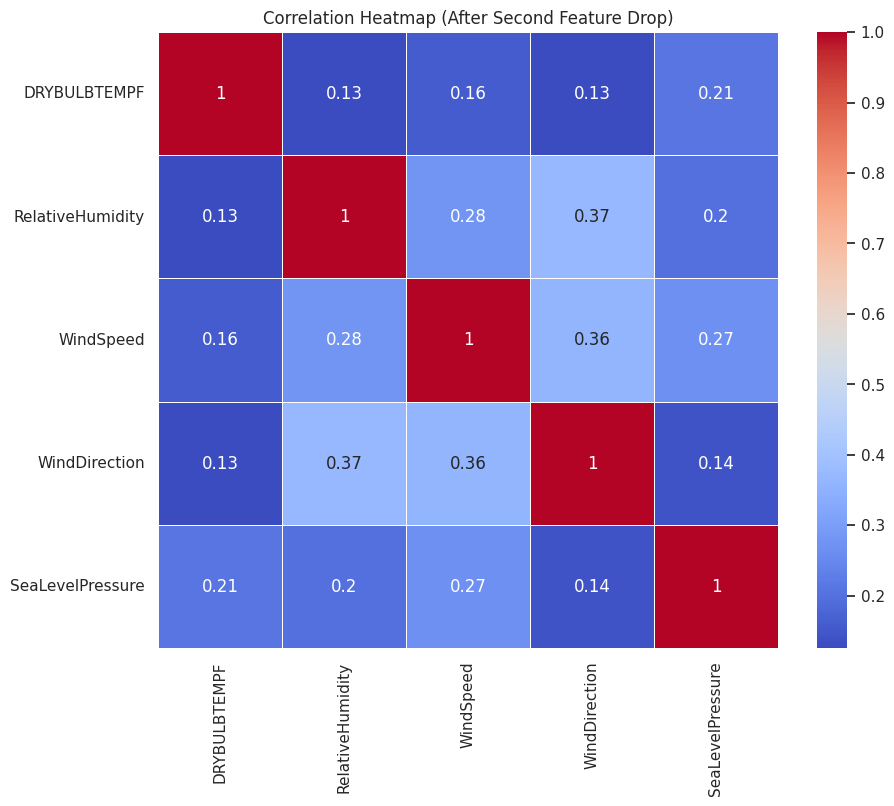

In [74]:
# Correlation heatmap after second-stage feature removal

numeric_df = df.select_dtypes(include=[np.number])

# Remove target from correlation plot
numeric_corr_df = numeric_df.drop(columns=['VISIBILITY'], errors='ignore')

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_corr_df.corr().abs(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap (After Second Feature Drop)")
plt.show()


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df, target_col):
    # Select numeric features only
    X = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')

    # Add intercept
    X['Intercept'] = 1

    vif_df = pd.DataFrame()
    vif_df['Feature'] = X.columns
    vif_df['VIF'] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]

    return vif_df[vif_df['Feature'] != 'Intercept']


vif_df = compute_vif(df, 'VISIBILITY')
vif_df


,Feature,VIF
0,DRYBULBTEMPF,1.113695
1,RelativeHumidity,1.333159
2,WindSpeed,1.341209
3,WindDirection,1.303993
4,SeaLevelPressure,1.298239


In [76]:
vif_df.sort_values(by='VIF', ascending=False)

,Feature,VIF
2,WindSpeed,1.341209
1,RelativeHumidity,1.333159
3,WindDirection,1.303993
4,SeaLevelPressure,1.298239
0,DRYBULBTEMPF,1.113695


In [77]:
# Numerical & categorical features (final)

numeric_features = [col for col in df.columns
                    if df[col].dtype != 'O' and col != 'VISIBILITY']

categorical_features = [col for col in df.columns if df[col].dtype == 'O']

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['DRYBULBTEMPF', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'SeaLevelPressure']
Categorical Features: ['DATE']


In [78]:
discrete_features = [col for col in numeric_features
                     if df[col].nunique() <= 25]

continuous_features = [col for col in numeric_features
                       if col not in discrete_features]

print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)

Discrete Features: []
Continuous Features: ['DRYBULBTEMPF', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'SeaLevelPressure']


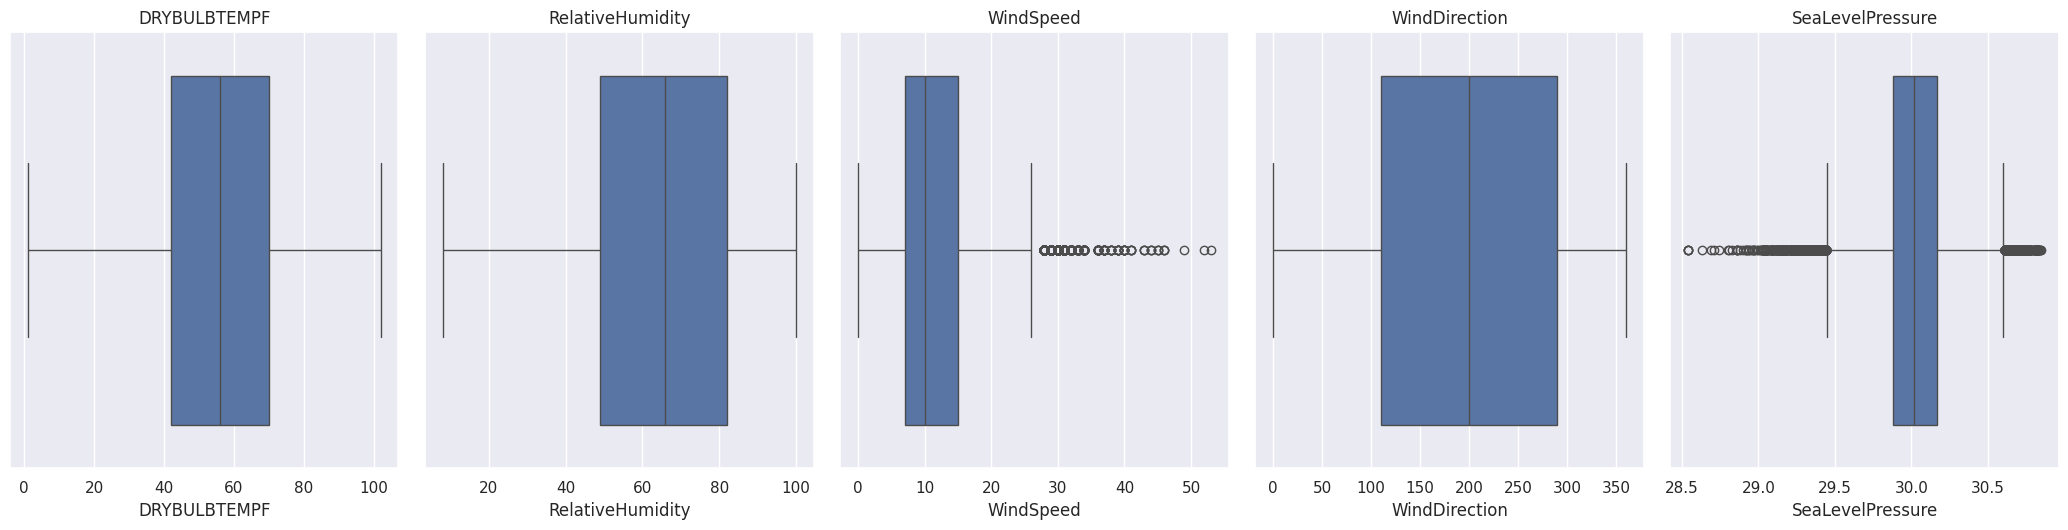

In [79]:
plt.figure(figsize=(25, 10))

for i, col in enumerate(continuous_features):
    plt.subplot(2, 6, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [80]:
def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

for col in continuous_features:
    treat_outliers_iqr(df, col)

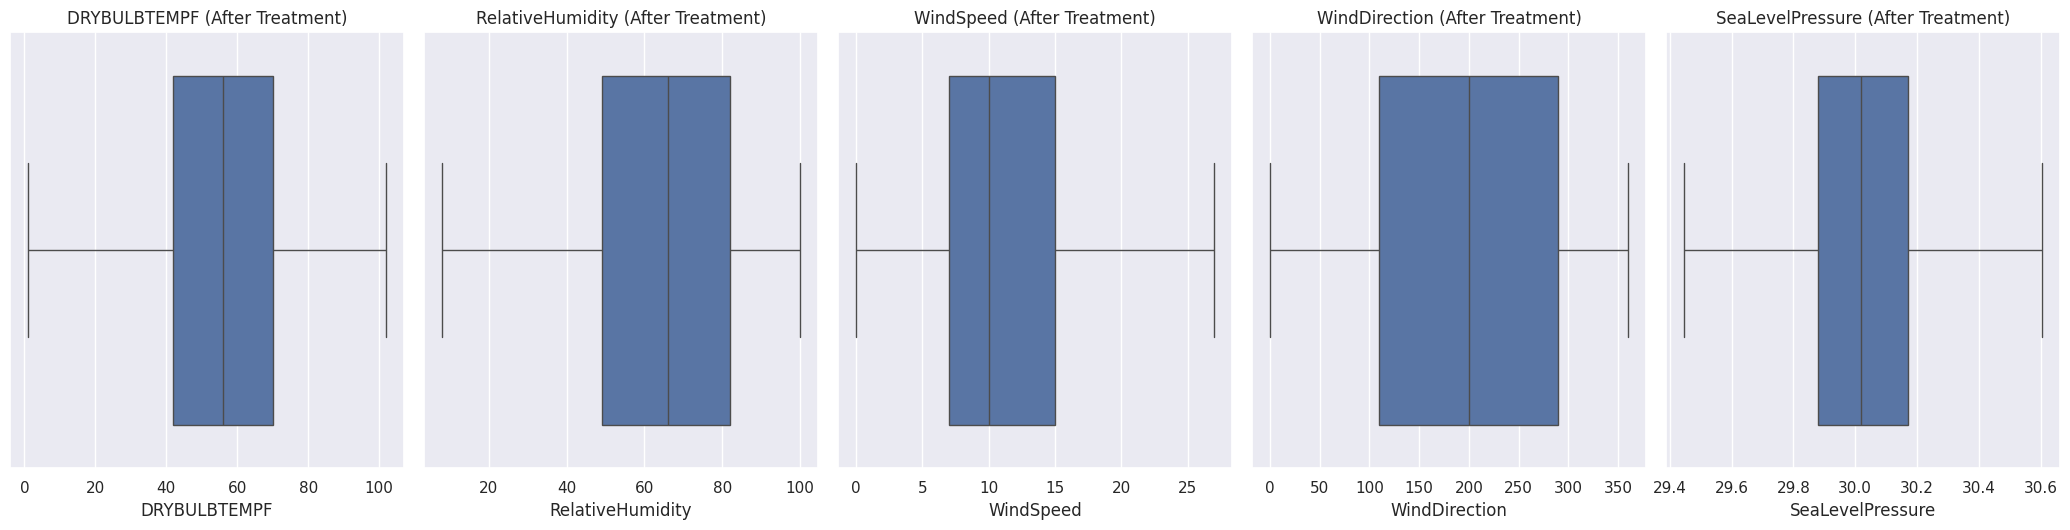

In [81]:
plt.figure(figsize=(25, 10))

for i, col in enumerate(continuous_features):
    plt.subplot(2, 6, i+1)
    sns.boxplot(x=df[col])
    plt.title(col + " (After Treatment)")

plt.tight_layout()
plt.show()

In [82]:
for col in numeric_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

,0
DATE,0
VISIBILITY,0
DRYBULBTEMPF,0
RelativeHumidity,0
WindSpeed,0
WindDirection,0
SeaLevelPressure,0


In [83]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


In [84]:
df[continuous_features].skew(axis=0, skipna=True)
# Skewness is within acceptable range, hence no power transformation required

,0
DRYBULBTEMPF,-0.149154
RelativeHumidity,-0.186890
WindSpeed,0.471627
WindDirection,-0.335758
SeaLevelPressure,0.005286


In [85]:
df.to_csv("final_preprocessed_visibility_data.csv", index=False)
print("✅ Final preprocessed dataset saved successfully")

✅ Final preprocessed dataset saved successfully
